# MNIST - Modified National Institute of Standards and Technology database

## Fetching MNIST data

In [1]:
# fetch_openml fetches data from openml by name or dataset id
from sklearn.datasets import fetch_openml

# Load data from https://www.openml.org/d/554
mnist = fetch_openml('mnist_784', version=1, cache=True) #cache parameter caches the data using joblib

## Looking into the MNIST data

In [2]:
#the above function returned a bunch (mnist is a dictionary like object with attributes)
mnist

{'data': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47',
  'pixel48',
  'pixel49',
  'pixel50',
  'pixel51',
  '

In [4]:
#70000 images and each image has 784 features. 28x28 pixels = 784 features
import numpy as np
X, y = mnist.data.astype(np.int64), mnist.target.astype(np.int64) #can also write mnist.data and mnist.target
X.shape, y.shape

((70000, 784), (70000,))

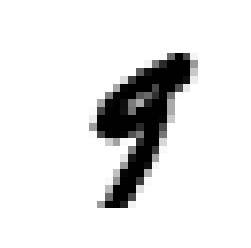

In [5]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

some_digit = X[36000] #taking a sample data and saving its feature vector
some_digit_image = some_digit.reshape(28,28) #reshaping the feature vector into 28x28 array

plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation = "nearest")
plt.axis("off")
plt.show()

In [6]:
y[36000] #verifies that the above nummber is 9

9

## Splitting the dataset

In [7]:
#MNIST dataset is alreadt split into training(60000) and test(10000) set
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [8]:
#shuffling the training set
## some algorithms are sensitive to order of training instances and they perform poorly if they get many similar instances in a row

#do not run this for the timing
#shuffle_index = np.random.permutation(60000)
#X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

## Training a binary classifier - Stochastic Gradient Descent (SGD Classifier)

sample classifier to identify only one digit (ex - 9). 
we will distinguish between only 2 classes; 9 and not-9

This classifier handles large datasets eficiently. It also deals with the training set independently, one at a time which makes it suitable for online learning

In [9]:
#creating target vetors for this classification task
y_train_9 = (y_train == 9)
y_test_9 = (y_test == 9)

In [10]:
#creating the classifier
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state = 42)

In [11]:
sgd_clf.fit(X_train, y_train_9)

C:\Users\diksh\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [12]:
sgd_clf.predict([some_digit])

array([ True])

## Measuring Accuracy

### 1. Using Cross validation

Cross validation is a resampling precodure used to evaluate a machine learning model on a limited data sample. The simple paramter k refers to the number of groups the data should be split into. So the procedure is called k-fold cross validation. The choice of k is usually 5 or 10, but there is no formal rule. As k gets larger, the difference in size between the training set and the resampling subsets gets smaller. As this difference decreases, the bias of the technique becomes smaller. In StatifiedKFold the splitting of data into folds may be governed by criteria such as ensuring that each fold has the same proportion of observations with a given categorical value, such as the class outcome value. This is called stratified cross-validation. The general procedure for cross-validation is - 
1. Shuffle the dataset randomly.
2. Split the dataset into k groups
3. For each unique group:
    1. Take the group as a hold out or test data set
    2. Take the remaining groups as a training data set
    3. Fit a model on the training set and evaluate it on the test set
    4. Retain the evaluation score and discard the model
4. Summarize the skill of the model using the sample of model evaluation scores

In [13]:
#Implementing cross_validation

from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits = 3, random_state = 42) #n_splits = k

for train_index, test_index in skfolds.split(X_train, y_train_9):  #split() generates indices to split the data
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = (y_train_9[train_index])
    X_test_fold = X_train[test_index]
    y_test_fold = (y_train_9[test_index])
    
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct/len(y_pred))

C:\Users\diksh\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


0.93685


C:\Users\diksh\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


0.9545


C:\Users\diksh\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


0.94935


In [14]:
#using cross_val_score()

from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_9, cv = 3, scoring = "accuracy")

C:\Users\diksh\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\diksh\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\diksh\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=

array([0.93685, 0.9545 , 0.94935])

In [15]:
from sklearn.base import BaseEstimator

class Never9Classifier(BaseEstimator):
    def fit(self, X, y=None):
        return self
    def predict(self, X, y=None):
        return np.zeros((len(X),1),dtype=bool)

In [16]:
never_9_clf = Never9Classifier()
cross_val_score(never_9_clf, X_train, y_train_9, cv=3, scoring="accuracy")

array([0.8993 , 0.8999 , 0.90335])

Above gives 90% accuracy. It is because only 10% of the images aer 9s, so if it always guesses that the image is nnot 9, then it will be right about 90% of the times. This demonstrates that accuracy is generally not the preferred performance measure for classifiers, especially when the dataset is skewed.

### 2. Using Confusion Matrix

cross_val_predict() is same as cross_val_score() i.e.. performs K fold cross validation but instead of returning the evaluation cost, it returns the prediction it makes on each test fold.

In [18]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_9, cv=3)

C:\Users\diksh\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\diksh\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\diksh\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=

- Each row in confusion matrix represents an actual class
- Each column in confusion matrix represents a predicted class.
- The first row considers non-9 images out of which 52841 are true negatives and 1210 are false positives
- The second row considers 9 images out of which 1976 are false negatives and 3973 are true positives

In [19]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_9, y_train_pred)

array([[52841,  1210],
       [ 1976,  3973]], dtype=int64)

In [22]:
#calculating precision and recall

from sklearn.metrics import precision_score, recall_score
precision = precision_score(y_train_9, y_train_pred)
recall = recall_score(y_train_9, y_train_pred)
print("Precision:", precision, " Recall:", recall)

Precision: 0.766544472313332  Recall: 0.6678433350142882


From the number it can be said that the algorithm is 
- 77% precise i.e.. it is correct only 77% of the times (correctly detects only 77% of 9s)
- 67% recall i.e.. it only detects 67% of the 9s

In [24]:
#combining both precision and recall into a single metric called F1 score. it is a harmonic mean of precision and recall
# F1 score favours classifiers with similar precision and recall
# but that is not the way. Inceasing precision decreases recall - Precision/Recall tradeoff

from sklearn.metrics import f1_score
f1_score(y_train_9, y_train_pred)

0.713798059647862

### Working on precision recall trade off

In [26]:
y_scores = sgd_clf.decision_function([some_digit]) #returns a score for each instance provided to it
y_scores

array([13625.40971728])

In [28]:
#predictions are made using any threshold based on the scores provided above by decision_function

#case 1 : 
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [29]:
#case 2:
threshold = 200000
y_some_digit_predict = (y_scores > threshold)
y_some_digit_predict

array([False])

The above cases predict that raising the threshold decreases recall. To decide which threshold to use, follow the below steps. From the graph one can select the threshold value that gives the best precision/recall tradeoff

In [30]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_9, cv = 3, method = "decision_function")

C:\Users\diksh\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\diksh\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\diksh\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=

In [32]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_9, y_scores)

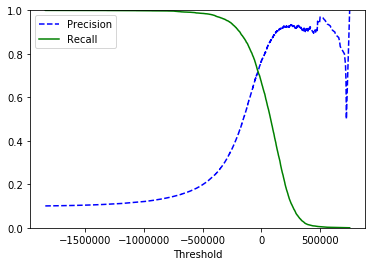

In [34]:
#plotting precision and recall as a function of threshold using matplotlib

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label = "Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc = "upper left")
    plt.ylim([0,1])

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

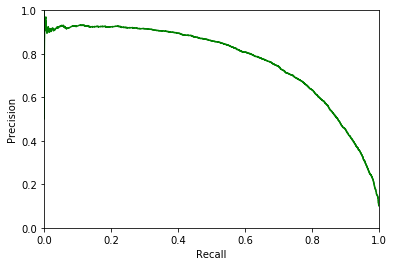

In [36]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "g-")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.ylim([0,1])
    plt.xlim([0,1])

plot_precision_vs_recall(precisions, recalls)
plt.show()

In [48]:
y_train_pred_90 = (y_scores > 200000)
precision_score(y_train_9, y_train_pred_90)
recall_score(y_train_9, y_train_pred_90)

0.2037317196167423